In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataFrame = pd.read_excel("maliciousornot.xlsx")

In [3]:
dataFrame.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


<Axes: >

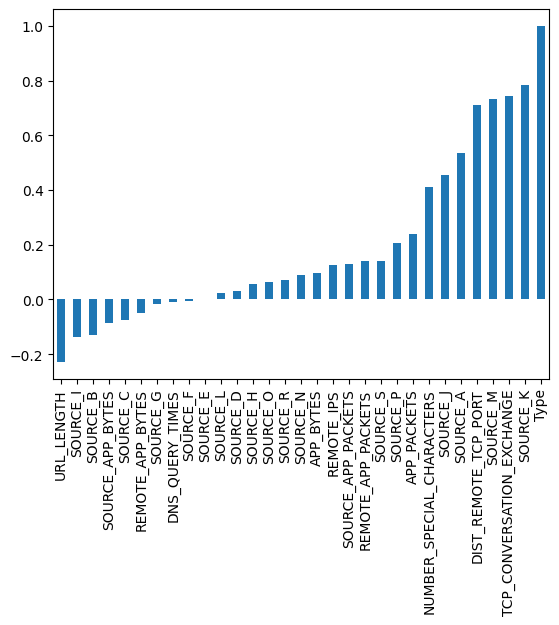

In [4]:
dataFrame.corr()["Type"].sort_values().plot(kind="bar")

<Axes: xlabel='Type', ylabel='count'>

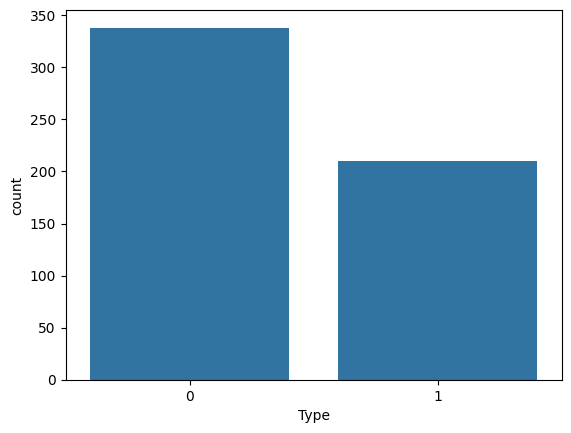

In [5]:
sns.countplot(x ="Type", data=dataFrame)

In [6]:
y = dataFrame["Type"].values
x = dataFrame.drop("Type", axis=1).values

In [7]:
xTrain,xTest,yTrain,yTest = train_test_split(x, y, test_size=0.3)

In [8]:
scaler = MinMaxScaler()

In [9]:
scaler.fit(xTrain)
xTrain = scaler.transform(xTrain)

In [10]:
scaler.fit(xTest)
xTrain = scaler.transform(xTrain)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping


In [12]:
print("xTrain shape:", xTrain.shape)
print("yTrain shape:", yTrain.shape)
print("xTest shape:", xTest.shape)
print("yTest shape:", yTest.shape)


xTrain shape: (383, 30)
yTrain shape: (383,)
xTest shape: (165, 30)
yTest shape: (165,)


In [13]:
model = Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [14]:
model.fit(x=xTrain, y=yTrain, epochs=700, validation_data=(xTest,yTest),verbose=1)

Epoch 1/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6488 - val_loss: 199.2535
Epoch 2/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6529 - val_loss: 187.2146
Epoch 3/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6506 - val_loss: 172.1084
Epoch 4/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6647 - val_loss: 159.8991
Epoch 5/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6476 - val_loss: 152.4637
Epoch 6/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6187 - val_loss: 141.5138
Epoch 7/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6462 - val_loss: 128.6527
Epoch 8/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6663 - val_loss: 119.9250
Epoch 9/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6345 - val_loss: 114.9235
Epoch 10/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6472 - val_loss: 104.9078
Epoch 11/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6220 - val_loss: 99.0218
Epoch 12/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0

In [15]:
model.history.history

{'loss': [0.6443381309509277,
  0.6428209543228149,
  0.6413782835006714,
  0.6407904028892517,
  0.6396435499191284,
  0.6397863030433655,
  0.6397286653518677,
  0.6388322114944458,
  0.6385062336921692,
  0.6381098628044128,
  0.638119101524353,
  0.6374561786651611,
  0.6373231410980225,
  0.6374877095222473,
  0.6374138593673706,
  0.6373231410980225,
  0.6370053887367249,
  0.6373426914215088,
  0.6371923685073853,
  0.6372341513633728,
  0.6369696855545044,
  0.6365631222724915,
  0.6364039182662964,
  0.6365969181060791,
  0.6367154717445374,
  0.6368127465248108,
  0.6372367143630981,
  0.6358095407485962,
  0.6358177065849304,
  0.6359822750091553,
  0.6362808346748352,
  0.6358686685562134,
  0.6356555223464966,
  0.6360867619514465,
  0.6379350423812866,
  0.6352930068969727,
  0.6353015303611755,
  0.6353976130485535,
  0.6352877020835876,
  0.6353293061256409,
  0.6353334784507751,
  0.6350827813148499,
  0.6349589824676514,
  0.634980320930481,
  0.6349536180496216,
  0.

<Axes: >

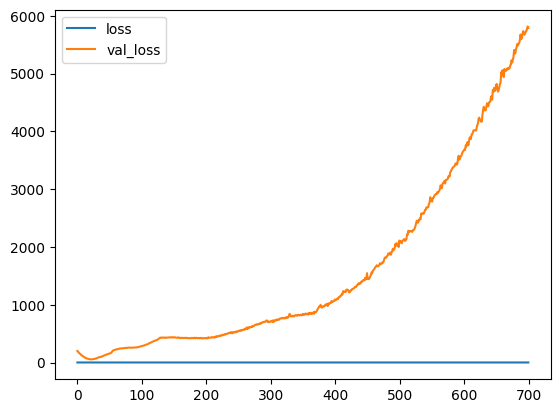

In [16]:
modelKaybi = pd.DataFrame(model.history.history)
modelKaybi.plot()

In [33]:
model1 = Sequential()

model1.add(Dense(units=30,activation="relu"))
model1.add(Dense(units=15,activation="relu"))
model1.add(Dense(units=15,activation="relu"))
model1.add(Dense(units=1,activation="sigmoid"))

model1.compile(loss="binary_crossentropy",optimizer="adam")

In [35]:
earlyStopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)

In [36]:
model1.fit(x=xTrain, y=yTrain, epochs= 700, validation_data=(xTest,yTest),verbose=1, callbacks=[earlyStopping])

Epoch 1/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.9214 - val_loss: 114.2820
Epoch 2/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7275 - val_loss: 92.6371
Epoch 3/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6589 - val_loss: 95.4551
Epoch 4/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6368 - val_loss: 90.5074
Epoch 5/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6412 - val_loss: 83.1004
Epoch 6/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6553 - val_loss: 78.1666
Epoch 7/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6310 - val_loss: 78.3525
Epoch 8/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6485 - val_loss: 76.8298
Epoch 9/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6333 - val_loss: 75.0522
Epoch 10/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6204 - val_loss: 73.9741
Epoch 11/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6182 - val_loss: 71.2018
Epoch 12/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

<Axes: >

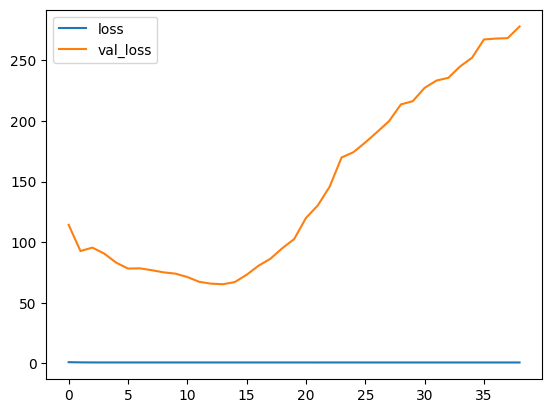

In [37]:
modelKaybi = pd.DataFrame(model1.history.history)
modelKaybi.plot()

In [38]:
model2 = Sequential()

model2.add(Dense(units=30,activation="relu"))
model2.add(Dropout(0.6))
model2.add(Dense(units=15,activation="relu"))
model2.add(Dropout(0.6))
model2.add(Dense(units=15,activation="relu"))
model2.add(Dropout(0.6))
model2.add(Dense(units=1,activation="sigmoid"))

model2.compile(loss="binary_crossentropy",optimizer="adam")

In [42]:
model2.fit(x=xTrain, y=yTrain, epochs= 700, validation_data=(xTest,yTest),verbose=1, callbacks=[earlyStopping])

Epoch 1/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.1793 - val_loss: 129.1468
Epoch 2/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1375 - val_loss: 86.6524
Epoch 3/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8221 - val_loss: 71.4773
Epoch 4/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8927 - val_loss: 82.6237
Epoch 5/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8054 - val_loss: 89.9721
Epoch 6/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8009 - val_loss: 100.1675
Epoch 7/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7979 - val_loss: 106.4110
Epoch 8/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7284 - val_loss: 111.9044
Epoch 9/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7260 - val_loss: 118.2587
Epoch 10/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7381 - val_loss: 125.9489
Epoch 11/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7552 - val_loss: 134.3530
Epoch 12/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3

<Axes: >

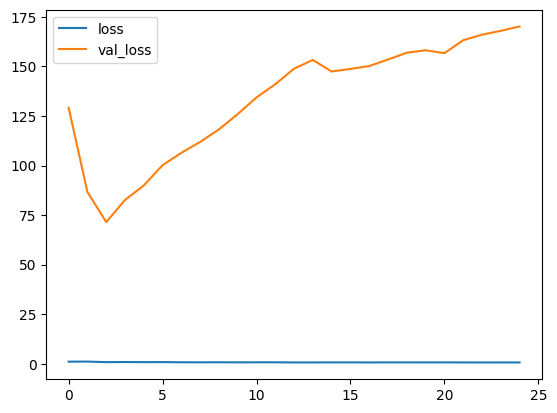

In [43]:
kayipDf = pd.DataFrame(model2.history.history)
kayipDf.plot()

In [54]:
predict_x=model.predict(xTest) 
classes_x=np.argmax(predict_x,axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [55]:
classes_x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [56]:
classes_x.shape

(165,)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
print(classification_report(yTest, classes_x))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        92
           1       0.00      0.00      0.00        73

    accuracy                           0.56       165
   macro avg       0.28      0.50      0.36       165
weighted avg       0.31      0.56      0.40       165



C:\Users\Furkan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Furkan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Furkan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classific

In [60]:
print(confusion_matrix(yTest, classes_x))

[[92  0]
 [73  0]]
